In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import itertools as it

In [2]:
with open('./data/smj_title_abstr.json') as f:
    smj_title_abstr_json = json.load(f)



In [7]:
article_count = pd.DataFrame(data = {vols : {issue_no : len(issue_cont.get('issue_toc'))
                                                for (issue_no, issue_cont) in issues.get('issues').items()
                                                if issue_no in list(it.chain(*issues.get('issue_done')))
                                                }
                                        for (vols, issues) in smj_title_abstr_json.items()}).fillna(value = 0).sum(axis = 0)

In [23]:
article_count.sum()

2360.0

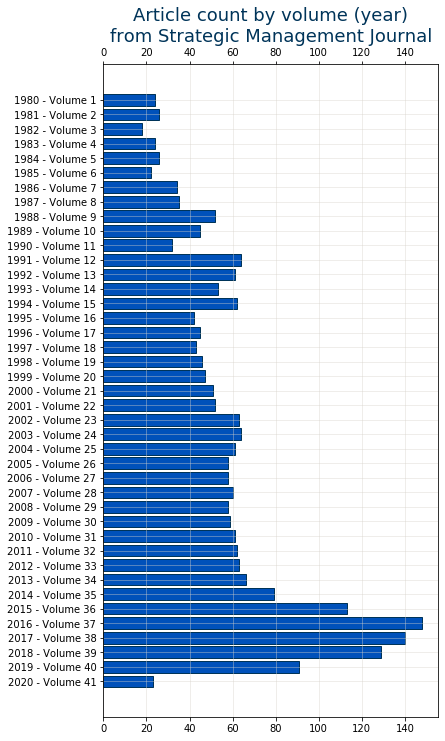

In [22]:
plt.figure(figsize = (6, 12))
plt.barh(y = article_count.index,
         width = article_count,
         color = '#0051ba',
         edgecolor = '#003459')
plt.grid(color = '#d7d2cb',
         alpha = 0.5)
plt.rcParams['xtick.top'] = True
plt.rcParams['xtick.labeltop'] = True
plt.title(label = 'Article count by volume (year)\n' +\
                  'from Strategic Management Journal',
          fontsize = 18,
          color = '#003459');

plt.savefig(fname = './graphics/smj_article_count.png',
            dpi = 150,
            transparent = True,
            bbox_inches = 'tight')